# Assignment 2 - Predict water temperature using scikit-learn regression (gradient descent)

For assignment two we will be working with the same data set from last week's homework assignment. Our goal will be to compare the performance of the normal equation to linear regression with gradient descent.

In order to speed-up the process of mini-batch gradient descent, we will also be scaling our data.

 

## Part A: Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)

3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

 

In [1]:
import pandas as pd
data= pd.read_csv('bottle.csv')
data.head()

/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_8401/3744233298.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('bottle.csv')


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data= data[['T_degC', 'Salnty', 'STheta', 'O2ml_L','Depthm' ]]
data.dropna(inplace=True)
data.shape

(661268, 5)

In [5]:
clean_data=data[(data['STheta'] <= 100)]
clean_data.shape

(661268, 5)

count    661268.000000
mean         25.797882
std           1.009609
min          20.996000
25%          24.941000
50%          25.972000
75%          26.634000
max          28.083000
Name: STheta, dtype: float64

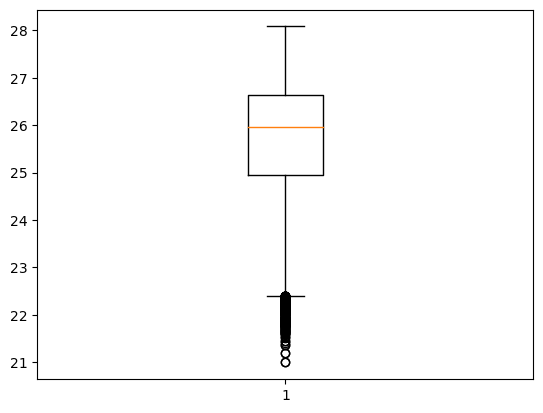

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.boxplot(clean_data['STheta'])
clean_data['STheta'].describe()

## Part B: Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-iLinks to an external site.

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.htmlLinks to an external site.

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [22]:
from sklearn.model_selection import train_test_split

X=clean_data[['Salnty', 'STheta', 'O2ml_L','Depthm']]
y=clean_data['T_degC'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X.shape= (661268, 4)
#y.shape= (661268, 1)

(661268, 4)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Part C: Linear Regression with sklearn

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

2) Print out the coefficients (including the intercept)


In [37]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
col_name = list(clean_data.columns)
col_name[0] = "Intercept"

lr_intercept = lin_reg.intercept_.tolist()[0]
lr_beta = lin_reg.coef_.tolist()[0]
lr_coef = [lr_intercept, lr_beta[0], lr_beta[1], lr_beta[2], lr_beta[3]]

lr_coef_df = pd.DataFrame(
    {
        'Column': col_name,
        'Coefficient': lr_coef
    })

lr_coef_df

,Column,Coefficient
0,Intercept,10.915418
1,Salnty,1.630466
2,STheta,-4.634591
3,O2ml_L,0.302068
4,Depthm,-0.474955


3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn
4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

5) Create a scatterplot that shows actual versus predicted values for the T_degC.

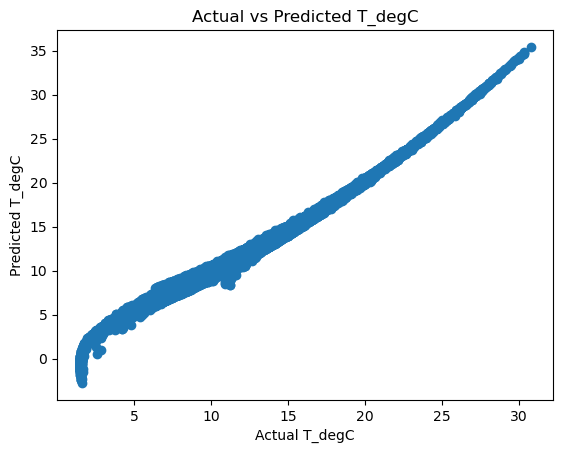

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt

#PREDICTION
y_pred_sklearn= lin_reg.predict(X_test_scaled)

#Evaluate
mse= mean_squared_error(y_test, y_pred_sklearn)
r2=r2_score(y_test, y_pred_sklearn)
explained_var=explained_variance_score(y_test, y_pred_sklearn)

## Step 5: Create a Scatterplot
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("Actual T_degC")
plt.ylabel("Predicted T_degC")
plt.title("Actual vs Predicted T_degC")
plt.show()



In [44]:
(coefficients, intercept, mse, r2, explained_var)

(array([[ 1.63046569, -4.6345913 ,  0.3020677 , -0.47495536]]),
 array([10.91541795]),
 0.11101117205433633,
 0.9937682503632342,
 0.9937684088237414)

## Part D: Gradient Descent Mini-Batch

Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.



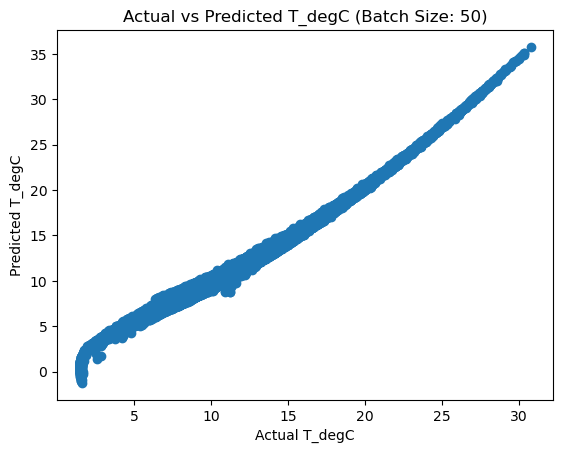

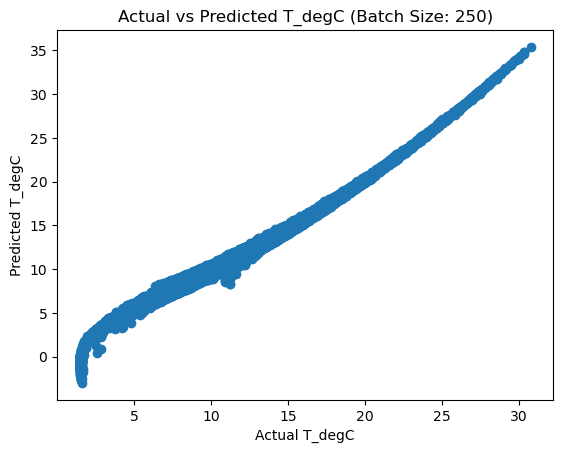

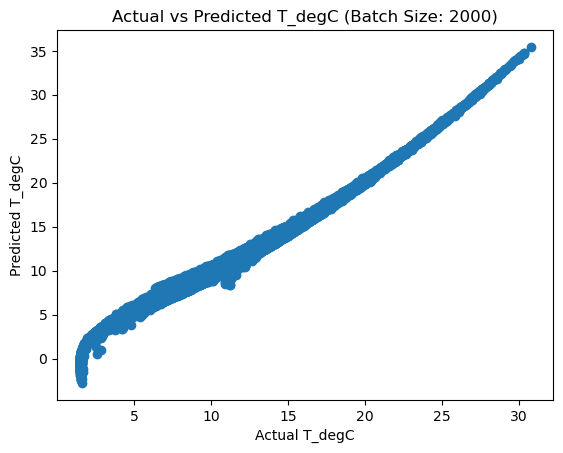

In [52]:
import numpy as np
from sklearn.utils import shuffle

eta = 0.1  # learning rate
n_epochs = 100
batch_sizes = [50, 250, 2000]
results = {}

np.random.seed(42)
theta = np.random.randn(5, 1)  # random initialization

# Add a column of 1s to X_train_scaled and X_test_scaled
X_train_scaled_with_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_with_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

for batch_size in batch_sizes:
    # Initialize random weights
    theta = np.random.randn(X_train_scaled_with_bias.shape[1], 1)
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(X_train_scaled_with_bias.shape[0])
        X_train_shuffled = X_train_scaled_with_bias[shuffled_indices]
        y_train_shuffled = y_train[shuffled_indices]

        for i in range(0, X_train_shuffled.shape[0], batch_size):
            xi = X_train_shuffled[i:i+batch_size]
            yi = y_train_shuffled[i:i+batch_size]

            # Calculate gradients
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)

            # Update theta
            theta -= eta * gradients

    # Predict and evaluate for test data
    y_test_pred = X_test_scaled_with_bias.dot(theta)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    explained_var_test = explained_variance_score(y_test, y_test_pred)

    # Predict and evaluate for train data
    y_train_pred = X_train_scaled_with_bias.dot(theta)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    explained_var_train = explained_variance_score(y_train, y_train_pred)

    # Save results
    results[batch_size] = {
        "mse_test": mse_test, "r2_test": r2_test, "explained_var_test": explained_var_test,
        "mse_train": mse_train, "r2_train": r2_train, "explained_var_train": explained_var_train
    }

    # Scatterplot for test data
    plt.scatter(y_test, y_test_pred)
    plt.xlabel("Actual T_degC")
    plt.ylabel("Predicted T_degC")
    plt.title(f"Actual vs Predicted T_degC (Batch Size: {batch_size})")
    plt.show()


3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.


In [53]:
import pandas as pd

# Assuming results dictionary is populated from the gradient descent code
test_error_table = {
    batch_size: [
        results[batch_size]["mse_test"],
        results[batch_size]["r2_test"],
        results[batch_size]["explained_var_test"]
    ]
    for batch_size in batch_sizes
}

mb_test_metrics = pd.DataFrame(
    {
        "Metrics": ["Mean Squared Error", "R-Squared", "Explained Variance"],
        "50 Mini-Batch Size": test_error_table[50],
        "250 Mini-Batch Size": test_error_table[250],
        "2000 Mini-Batch Size": test_error_table[2000]
    }
)

mb_test_metrics


,Metrics,50 Mini-Batch Size,250 Mini-Batch Size,2000 Mini-Batch Size
0,Mean Squared Error,0.118491,0.111729,0.111114
1,R-Squared,0.993348,0.993728,0.993762
2,Explained Variance,0.993403,0.993732,0.993763



6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

In [54]:
import pandas as pd

# Assuming results dictionary is populated from the gradient descent code
train_error_table = {
    batch_size: [
        results[batch_size]["mse_train"],
        results[batch_size]["r2_train"],
        results[batch_size]["explained_var_train"]
    ]
    for batch_size in batch_sizes
}

mb_train_metrics = pd.DataFrame(
    {
        "Metrics": ["Mean Squared Error", "R-Squared", "Explained Variance"],
        "50 Mini-Batch Size": train_error_table[50],
        "250 Mini-Batch Size": train_error_table[250],
        "2000 Mini-Batch Size": train_error_table[2000]
    }
)

mb_train_metrics


,Metrics,50 Mini-Batch Size,250 Mini-Batch Size,2000 Mini-Batch Size
0,Mean Squared Error,0.118167,0.111488,0.110666
1,R-Squared,0.993382,0.993756,0.993802
2,Explained Variance,0.993442,0.993761,0.993802


## Part E: Conceptual Questions

### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.


While parameter estimation in the normal equation requires matrix transformation to minize the cost function, Gradient Descent repeat over to find the fastest way to minize the loss function by calculating rate of change for each parameter through the Jacobian and Hessian matrices.

The gradient descent method is important for speeding up the process and eliminating large memory and large parameter sizes.

### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?


Mini-Batch Gradient Descent trains the model using the small random sets of training data while Stochastic gradient descent use training data of a single point per mini-batch. Therefore increasing the size of mini-batches results in a smoother learning process (with less impact from outliers), but it requires a proportionally larger memory size.

### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.





The best-performing version of gradient descent is with a batch size of 2000, although all of them perform at an extremely high level. This is because a larger batch size smoothes outliers to a better extent.

there is little sign of overfitting as both the train and testing data has low MSE and hight R2 ans explained Variance

### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

Learning rate is the parameter that determines the size of the steps taken the ge the minimun cost function. It might be helpful to change the learning rate over time because for high learning rate cause the algorithm to converge quickly, but it risks overshooting the minimum, leading to divergence. Conversely, a low learning rate ensures a more precise convergence but can be very slow and may get stuck in local minima.

### 5) Why would a data scientist want to use early stopping in gradient descent?
Early stopping is a form of regularization, ennding model training before training loss finishes decreasing. Using earlt stopping, can end model training where the loss on a validation data sets starts to increase,where when generalization performance worsens.